Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Jedinečným identifikátorem zastávky je **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek uvažujte, že se jedná o jednu a tutéž stanici.

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

In [1]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

Import datasetu a základní informace

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

pid_stops = pd.read_csv('d.csv')
display(pid_stops.head())
display(pid_stops.info())

,stop_from,stop_from_name,stop_to,stop_to_name,depart_from,arrive_to,route_type,is_night,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,U2991Z301,Hněvice,T58005,Hněvice seř.n.,4:53:00,4:54:30,2,0,1,1,1,1,1,0,0
1,T58005,Hněvice seř.n.,U4610Z301,Záluží,4:54:30,4:56:00,2,0,1,1,1,1,1,0,0
2,U4610Z301,Záluží,U4609Z301,Dobříň,4:56:00,4:59:00,2,0,1,1,1,1,1,0,0
3,U4609Z301,Dobříň,U4608Z301,Roudnice nad Labem,4:59:00,5:03:00,2,0,1,1,1,1,1,0,0
4,U4608Z301,Roudnice nad Labem,U4609Z301,Dobříň,4:36:00,4:38:00,2,0,1,1,1,1,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   stop_from       1642433 non-null  object
 1   stop_from_name  1642433 non-null  object
 2   stop_to         1642433 non-null  object
 3   stop_to_name    1642433 non-null  object
 4   depart_from     1642433 non-null  object
 5   arrive_to       1642433 non-null  object
 6   route_type      1642433 non-null  int64 
 7   is_night        1642433 non-null  int64 
 8   monday          1642433 non-null  int64 
 9   tuesday         1642433 non-null  int64 
 10  wednesday       1642433 non-null  int64 
 11  thursday        1642433 non-null  int64 
 12  friday          1642433 non-null  int64 
 13  saturday        1642433 non-null  int64 
 14  sunday          1642433 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 188.0+ MB


None

Funkce na kontrolu špatného formatu v sloupcích depart_from a arrive_to

In [3]:
def check_wrong_time_percentage():
    invalid_depart = pid_stops[pid_stops['depart_from'].apply(lambda x: int(x.split(':')[0])) > 24]
    invalid_arrive = pid_stops[pid_stops['arrive_to'].apply(lambda x: int(x.split(':')[0])) > 24]
    
    invalid_all = pd.merge(invalid_arrive, invalid_depart, left_index=True, right_index=True)
    
    percentage = len(invalid_all) / len(pid_stops) 
    print(f'Percentage of rows with wrong date: {percentage * 100}')

### Předzpracování dat
Úprava sloupců depart_from a arrive_to. Nejdříve upravíme pomocí modulo a pak převedeme na datetime

In [4]:
# split date into pieces and the merge them
pid_stops['depart_from'] = pid_stops['depart_from'].apply(lambda x: f"{int(x.split(':')[0]) % 24:02d}:{x.split(':')[1]}:{x.split(':')[2]}")
pid_stops['arrive_to'] = pid_stops['arrive_to'].apply(lambda x: f"{int(x.split(':')[0]) % 24:02d}:{x.split(':')[1]}:{x.split(':')[2]}")

check_wrong_time_percentage()
# convert to right type
# Dont know why but it still keeps object type and not datetime
pid_stops['depart_from'] = pd.to_datetime(pid_stops['depart_from'], format='%H:%M:%S').dt.time
pid_stops['arrive_to'] = pd.to_datetime(pid_stops['arrive_to'], format='%H:%M:%S').dt.time

pid_stops['depart_from_hour'] = pd.to_datetime(pid_stops['depart_from'], format='%H:%M:%S').dt.hour
pid_stops['arrive_to_hour'] = pd.to_datetime(pid_stops['arrive_to'], format='%H:%M:%S').dt.hour

display(pid_stops.info())

Percentage of rows with wrong date: 0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642433 entries, 0 to 1642432
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   stop_from         1642433 non-null  object
 1   stop_from_name    1642433 non-null  object
 2   stop_to           1642433 non-null  object
 3   stop_to_name      1642433 non-null  object
 4   depart_from       1642433 non-null  object
 5   arrive_to         1642433 non-null  object
 6   route_type        1642433 non-null  int64 
 7   is_night          1642433 non-null  int64 
 8   monday            1642433 non-null  int64 
 9   tuesday           1642433 non-null  int64 
 10  wednesday         1642433 non-null  int64 
 11  thursday          1642433 non-null  int64 
 12  friday            1642433 non-null  int64 
 13  saturday          1642433 non-null  int64 
 14  sunday            1642433 non-null  int64 
 15  depart_from_hour  1642433 

None

## Vizualizace pražské tramvajové sítě
Při počítání souřadnic s vicero lokacemi jsem udělal průměr těchto souřadnic, jelikož v vizualizaci celého města nebude vidět rozdíl a tyto různé souřadnice pro odlišné typy dopravních přostředků v reálném životě se budou nacházet v těsné blízkosti a nebudou hrát velkou roli.

In [119]:
tram_data = pid_stops[pid_stops['route_type'] == 0]
# get unique name to use as nodes
tram_stops = tram_data['stop_from_name'].unique()

In [6]:
stops_info = pd.read_csv('stops.txt')
# want only tram stops
tram_stops_info = stops_info[stops_info['stop_name'].isin(tram_data['stop_from_name'].unique())]
# get the average coordinates for stops with multiple types of transport
average_coordinates = tram_stops_info.groupby('stop_name')[['stop_lat', 'stop_lon']].mean().reset_index()

# save for node positions in plot
tram_pos = {}
for index, row in average_coordinates.iterrows():
    tram_pos[row['stop_name']] = np.array([row['stop_lon'], row['stop_lat']])


In [7]:
G = nx.DiGraph()
G.add_nodes_from(tram_stops)

# compute weight of each edge
# dont know I understood task right, because 7000 weight for some stops is bit too much in my opinion
for _, row in tram_data.iterrows():
    edge_key = (row['stop_from_name'], row['stop_to_name'])
    current_weight = row.iloc[8:].sum()
    if G.has_edge(*edge_key):
        G[edge_key[0]][edge_key[1]]['weight'] += current_weight
    else:
        G.add_edge(*edge_key, weight=current_weight)
        

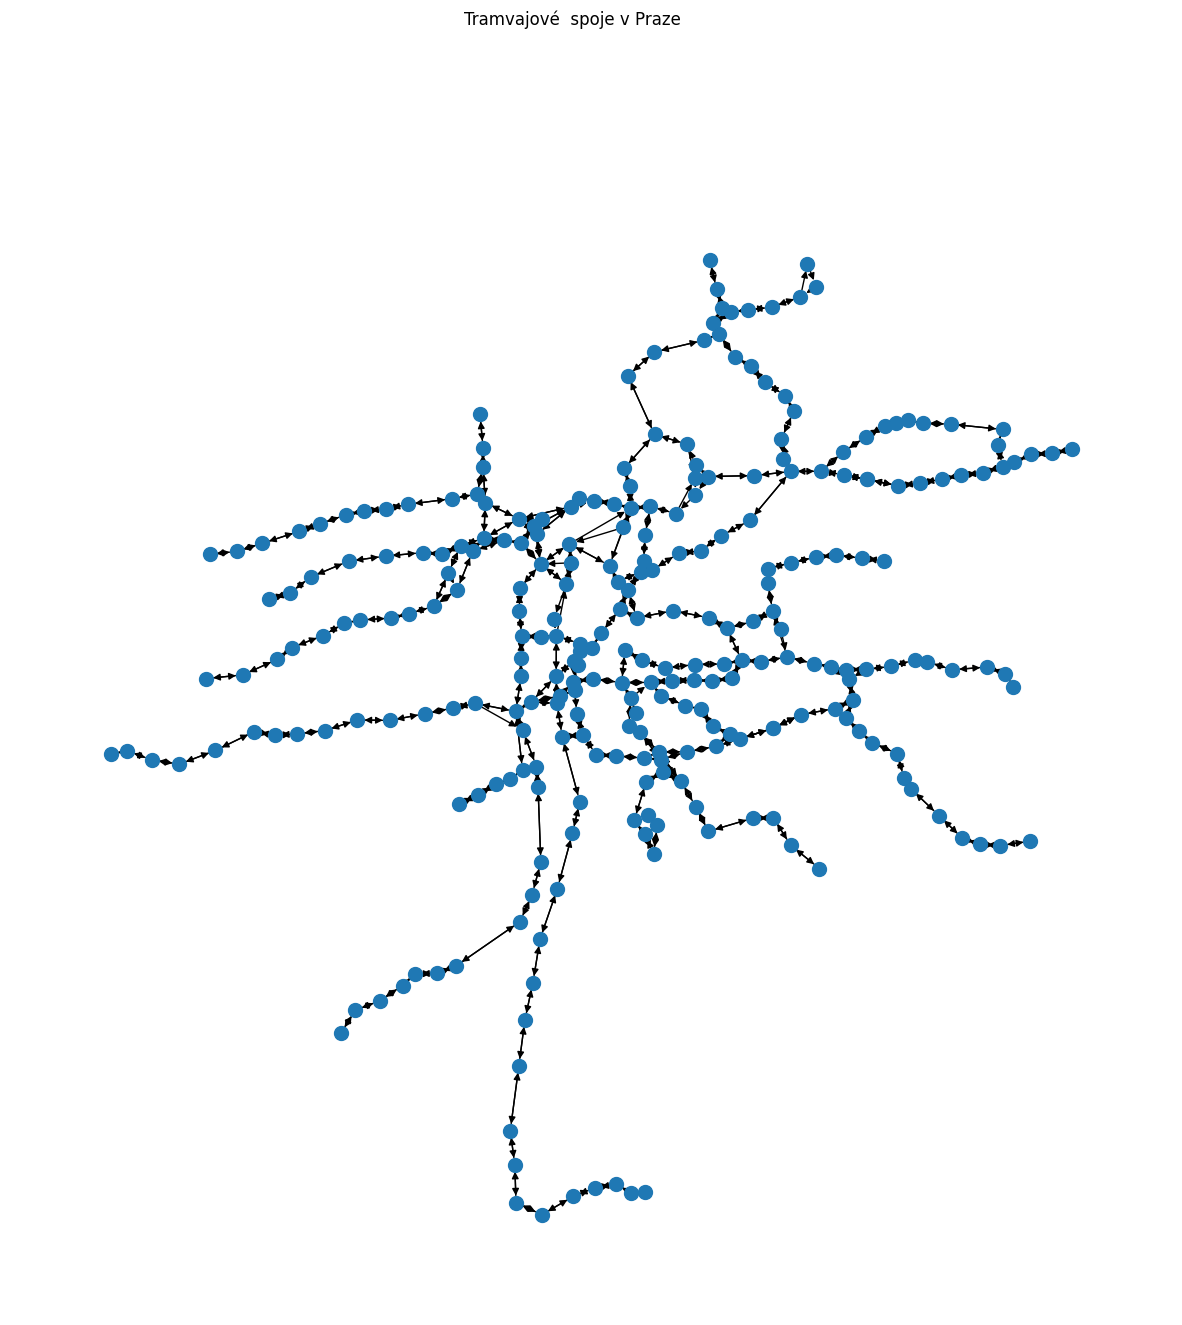

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos=tram_pos, with_labels=False, node_size=100)
fig.suptitle("Tramvajové  spoje v Praze")
plt.show()

### Centralita blízkosti

![color distribution](closeness_centrality_plasma.png "Info about colors in graph.More yellow = more better").

Pro zastávky to znamená, jak snadno je dosažitelná ze všech ostatních zastávek.
Zastávky s vysokou closeness centrality jsou dobře dostupné z ostatních zastávek a mohou být považovány za centrální body sítě.
Zastávky s nízkou closeness centrality mohou být více odlehlé a mohou vyžadovat delší cesty pro dosažení od ostatních zastávek.

Můžeme vidět, že top 3 zástavek se nachází v centru města, což i dává smysl. V centru je spousta atrakci, takže je potřeba pro dobrou dostupnost z jiných častí města.
Na druhou stranu nejméně významné jsou se nacházi okrajích města, blízko sidlišť a vede tam malo spojů.

Nejdůležitější 3 zastávky:
Zastávka Malostranská: 0.09625300790649707
Zastávka Staroměstská: 0.09543285616905249
Zastávka Čechův most: 0.09488309047780413

Nejméně významné 3 zastávky:
Zastávka Sídliště Modřany: 0.03870611003594139
Zastávka Nádraží Hostivař: 0.03796095444685466
Zastávka Levského: 0.0


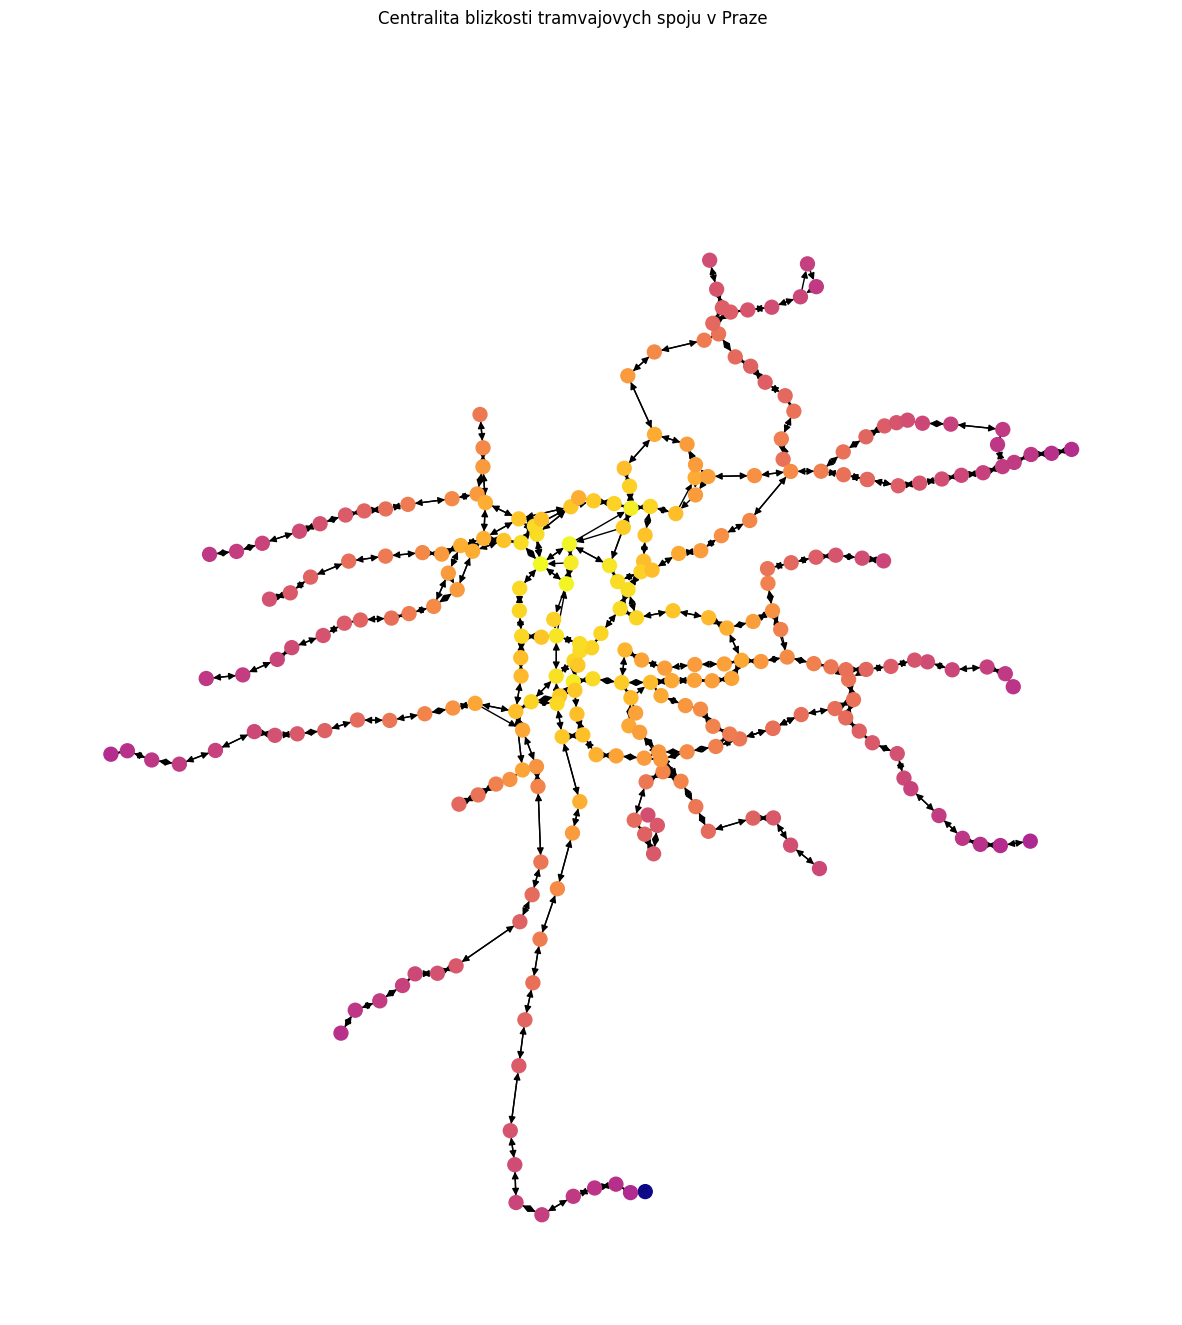

In [122]:
closeness_centrality = nx.closeness_centrality(G)


# dont know how to add color bar as label, how it is done in courses presentation
node_colors = [closeness_centrality[node] for node in G.nodes]
fig, ax =plt.subplots(figsize=(15, 15))

#sort to get top and bottom 3
sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_3_closeness= sorted_nodes[:3]
bottom_3_closeness = sorted_nodes[-3:]

print("Nejdůležitější 3 zastávky:")
for node, closeness in top_3_closeness:
    print(f"Zastávka {node}: {closeness}")

print("\nNejméně významné 3 zastávky:")
for node, closeness in bottom_3_closeness:
    print(f"Zastávka {node}: {closeness}")

nx.draw(G, pos=tram_pos, node_color=node_colors, cmap=plt.cm.plasma, with_labels=False, node_size=100)
fig.suptitle('Centralita blizkosti tramvajovych spoju v Praze')
plt.show()

### Centralita mezilehlosti
Pro zastávky to znamená, jak často jsou na trasách mezi dvěma různými zastávkami.

Pro zastávky Malostranská, Jiráskovo náměstí a Národní divadlo mají nejvyšší hodnoty, lze odvodit několik závěrů:
 * mohou být vnímány jako střední místa v síti, která zajišťují efektivní spojení mezi různými částmi města nebo dopravními trasami.
 * mohou být strategicky umístěna tak, aby usnadňovala přesuny cestujících v rámci systému hromadné dopravy
 * jsou často spojeny s turistickými a kulturními atrakcemi v Praze
 * může odrážet také důležitost pro turisty, kteří chtějí navštívit historická nebo kulturní místa

Zastávky s nízkou betweenness centrality nejsou klíčové pro propojení různých tras a mohou být specializovány pro určitou linku nebo oblast
Anomálii je zde konečná zástavka Zvonářka, i když se nachází ve Vinohradech, jedno z nejdostupnějších oblasti v Praze. Po googleni jsem zjistil, že jediný dostupný spoj je jedná tramvaj číslo 23, kterou lze nahradit jinými dopravními prostředky.

In [123]:
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

#sort to get top and bottom 3
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_3_betweenness = sorted_nodes[:3]
bottom_3_betweenness = sorted_nodes[-3:]

print("Nejdůležitější 3 zastávky:")
for node, betweenness in top_3_betweenness:
    print(f"Zastávka {node}: {betweenness}")

print("\nNejméně významné 3 zastávky:")
for node, betweenness in bottom_3_betweenness:
    print(f"Zastávka {node}: {betweenness}")

Nejdůležitější 3 zastávky:
Zastávka Jiráskovo náměstí: 0.38700716845878136
Zastávka Malostranská: 0.37986431131592424
Zastávka Národní divadlo: 0.3667178699436764

Nejméně významné 3 zastávky:
Zastávka Holyně: 0.0
Zastávka Zvonařka: 0.0
Zastávka Radlická: 0.0


Z grafu dole můžeme udělat pár záverů:
* Centrální zastávky s vyšší betweenness centrality jsou v menšině, což naznačuje, že existují určité klíčové body v síti, které jsou strategicky umístěny pro propojení.
* Vysoký počet zastávek s nízkými hodnotami betweenness centrality může ukazovat na decentralizovanou a redundantní strukturu sítě.
* Síť může být robustní a odolná proti výpadkům, protože propojení mezi trasami není závislé na jedné klíčové zastávce
* Při plánování dopravních tras by bylo možné zaměřit se na zlepšení propojení mezi zastávkami s nízkými hodnotami betweenness centrality

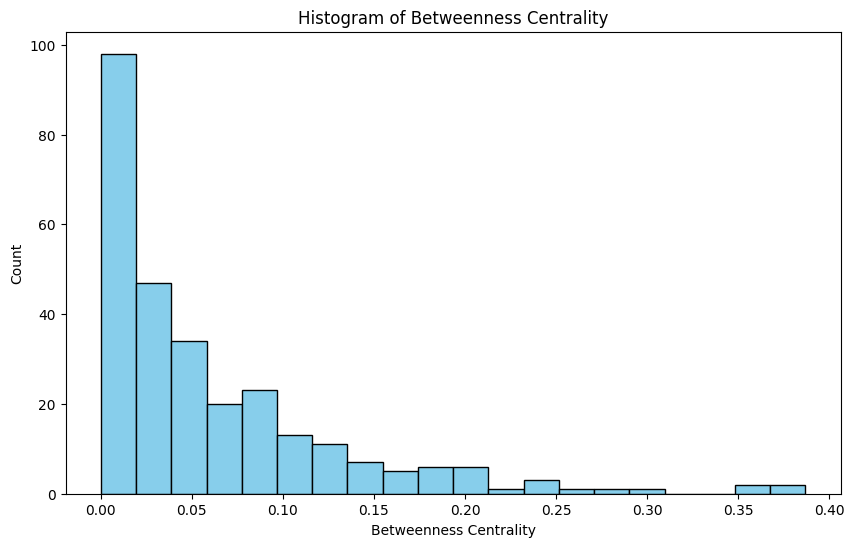

In [11]:
values = list(betweenness_centrality.values())

# Vytvoření histogramu
plt.figure(figsize=(10, 6))
plt.hist(values, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Betweenness Centrality')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Count')

# Zobrazení grafu
plt.show()

### Stupňová centralita uzlu
Pro zastávky to může znamenat, kolik spojů je přímo napojeno na tuto zastávku.

Stejné jak u centrality mezilehlosti a blízkosti Malostranská je klíčovým přestupním bodem nebo uzlem s hustým spojovacím provozem. Když Levského je koncovými bodem, proto není tak snadno dostupná. 

In [12]:
graph_degree_centrality = nx.degree_centrality(G)

#sort to get top and bottom 3
sorted_nodes = sorted(graph_degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_3_degree = sorted_nodes[:3]
bottom_3_degree = sorted_nodes[-3:]

print("Nejdůležitější 3 zastávky:")
for node, num in top_3_degree:
    print(f"Zastávka {node}: {num}")

print("\nNejméně významné 3 zastávky:")
for node, num in bottom_3_degree:
    print(f"Zastávka {node}: {num}")

Nejdůležitější 3 zastávky:
Zastávka Malostranská: 0.04642857142857143
Zastávka Otakarova: 0.04285714285714286
Zastávka Náměstí Bratří Synků: 0.04285714285714286

Nejméně významné 3 zastávky:
Zastávka Zvonařka: 0.007142857142857143
Zastávka Radlická: 0.007142857142857143
Zastávka Levského: 0.0035714285714285713


# Vlastní otázky

### Počet spojů na nejvytíženějších zastávkách v Praze během dne.

[nejvytíženější denní pražské zastávky](https://www.praha.eu/jnp/cz/doprava/mhd/ktere_tramvaje_a_zastavky_jsou.html)

Podle této stránky "Maximální hodinová zátěž tramvajové sítě je v ranní špičce (7.15 – 8.15 hodin) a v odpolední špičce (16.30 – 17.30 hodin) ", což opravdu odpovídá realitě na tomto grafu. 

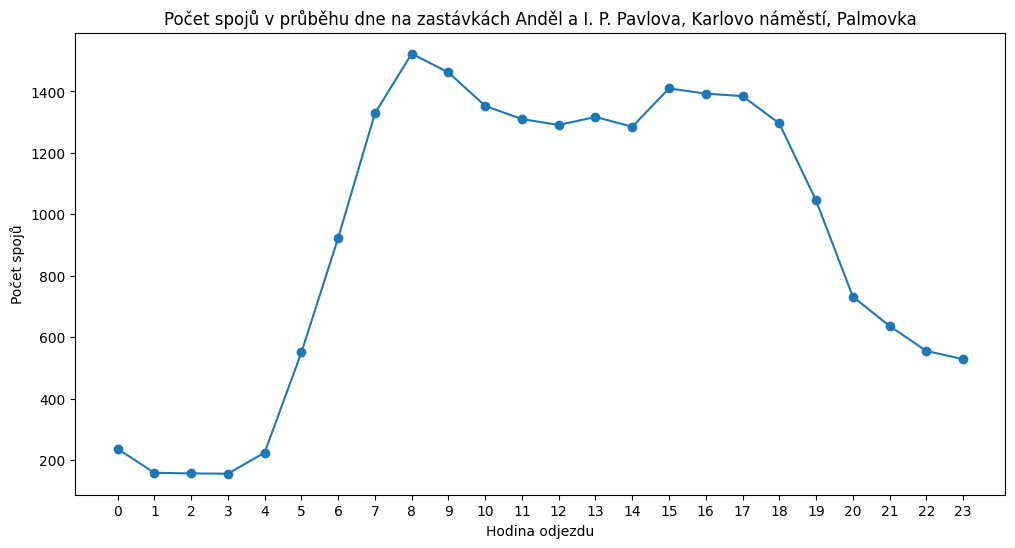

In [13]:
selected_stops = ['Anděl', 'I. P. Pavlova', 'Palmovka', 'Karlovo náměstí']

filtered_data = tram_data[tram_data['stop_from_name'].isin(selected_stops)]

hourly_departures = filtered_data.groupby('depart_from_hour')['depart_from'].count()

plt.figure(figsize=(12, 6))
hourly_departures.plot(kind='line', marker='o')
plt.title('Počet spojů v průběhu dne na zastávkách Anděl a I. P. Pavlova, Karlovo náměstí, Palmovka')
plt.xlabel('Hodina odjezdu')
plt.ylabel('Počet spojů')
plt.xticks(range(24))
plt.show()

### Analýza nočních tras v Praze

Dostupnost nočních spojů může podporovat noční život ve městě tím, že umožňuje lidem snadný přesun mezi různými oblastmi, včetně těch, které jsou známé pro svou noční aktivitu.

Pomocí nočních spojů lze dosáhnout téměř všude s minimálním omezením na 22 zastávek, lze usuzovat na vysokou dostupnost noční dopravy ve vašem regionu nebo městě.

Majorita zastávek jsou nedostupné v noci, ale snadno dosažitelené pěšky. Výjimkou jsou okrajové oblasti, kde člověk musí brát v potaz tuto skutečnost.

Zástavky, do kterých nelze dojet pomocí nočních spojů: {'Pražská tržnice', 'Myslíkova', 'Lotyšská', 'Tusarova', 'Holyně', 'Laurová', 'Škola Radlice', 'Pankrác', 'Braunova', 'Zelená', 'Střelecký ostrov', 'Pohořelec', 'Těšnov', 'Křížová', 'Brusnice', 'Radlická', 'Vltavská', 'Štvanice', 'Zvonařka', 'Špejchar', 'Nádraží Podbaba', 'Náměstí Olgy Scheinpflugové'}


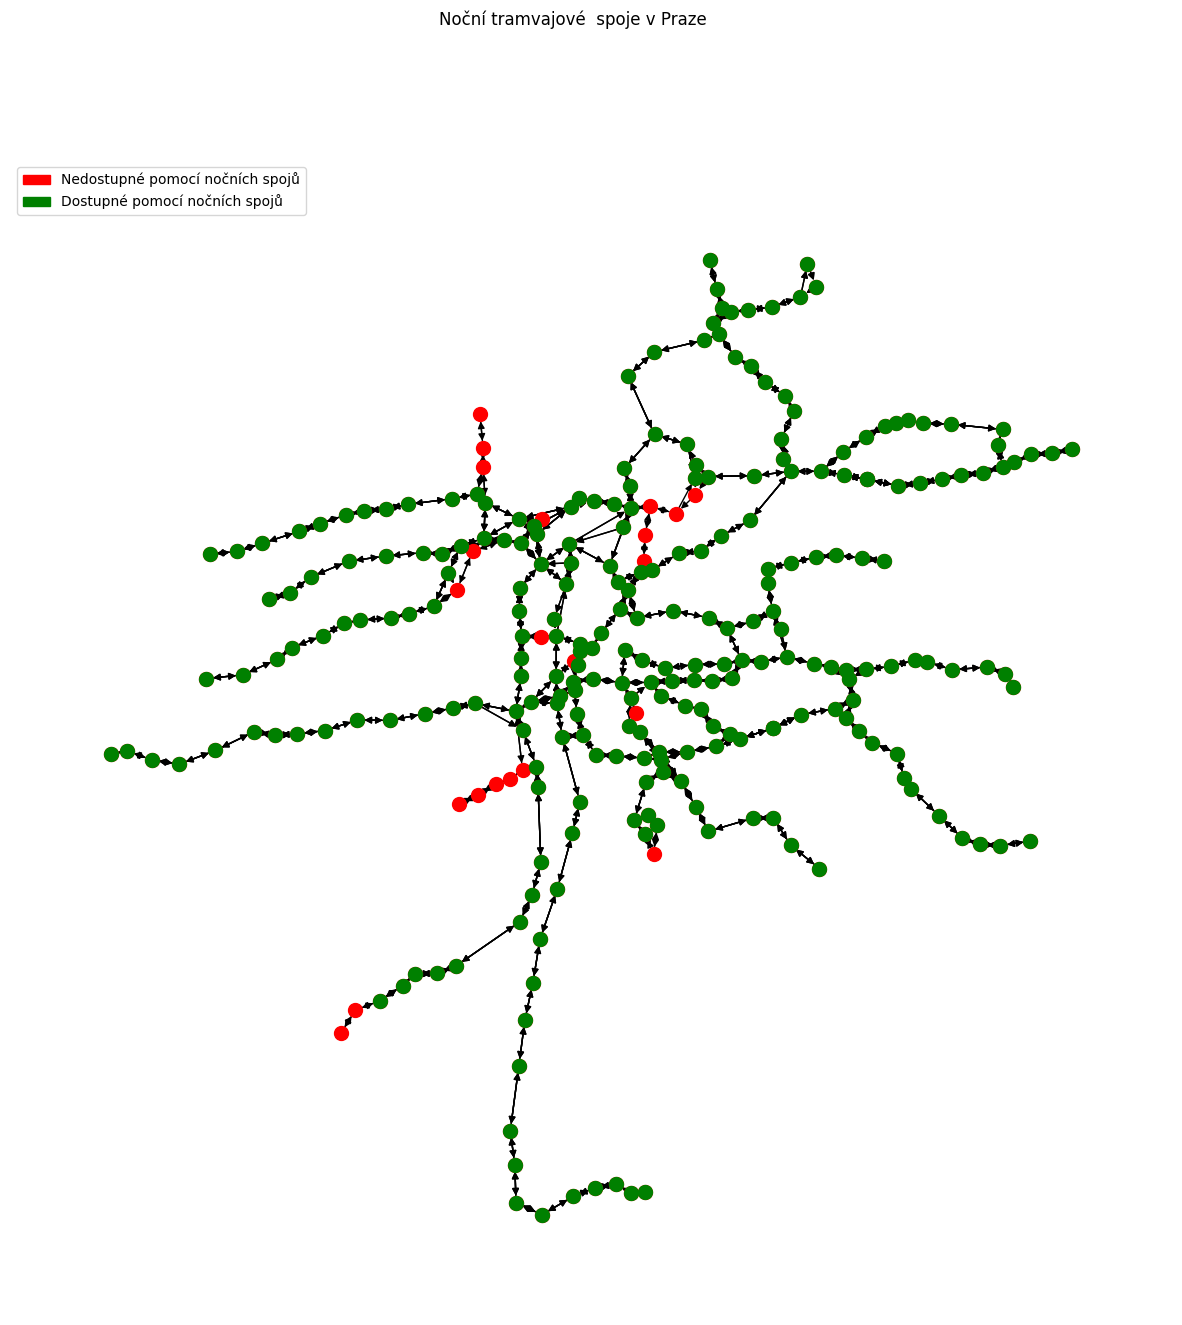

In [121]:
import matplotlib.patches as patches

night_routes = tram_data[tram_data['is_night'] == 1]
night_stops = night_routes['stop_from_name'].unique()

G_sub = G.subgraph(night_stops)
all_nodes = set(G.nodes()) | set(G_sub.nodes())
node_colors = ['green' if node in G_sub.nodes() else 'red' for node in all_nodes]

unavailable_stops = set(G.nodes).difference(set(G_sub.nodes))
print(f"Zástavky, do kterých nelze dojet pomocí nočních spojů: {unavailable_stops}")


fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos=tram_pos, node_color='red', with_labels=False, node_size=100)
nx.draw(G_sub, pos=tram_pos, node_color='green', with_labels=False, node_size=100)
fig.suptitle("Noční tramvajové  spoje v Praze")

legend_labels = {
    'Nedostupné pomocí nočních spojů': 'red',
    'Dostupné pomocí nočních spojů': 'green',
}

handles = [patches.Patch(color=color, label=label) for label, color in legend_labels.items()]
ax.legend(handles=handles, loc='upper left')

plt.show()


### Analýza frekvence denních a nočních zastávek

[noční spoje](https://www.dpp.cz/kontakt/casto-kladene-dotazy/detail/44_75-jak-jezdi-nocni-spoje)

Z tohoto článku můžeme přečíst, že centránlí noční spoj je zastávka Lazarská, což podle dat se dá ověřit. Z dalšího článku výše o nejvytíženějších zástavkách, Karlovo náměstí a Anděl skutečně tam patří.

Frekvence nočních zastávek jsou obecně nižší než denní, což je očekávatelné. Existují však některé zastávky, jako například Karlovo náměstí, které zůstávají aktivní po celý den i noc.

Denní top 10 zastávek zahrnují klíčové dopravní uzly a kulturní destinace, zatímco noční top 10 zastávek mohou odrážet oblasti s nočním životem nebo specifickými nočními trasami.

Top 10 nočních zastávek jsou vetšinou ve centru města s vysokou hustotou baru a klubu. 

In [118]:
daily_stops = tram_data[tram_data['is_night'] == 0]
night_stops = tram_data[tram_data['is_night'] == 1]

frequency_daily = daily_stops['stop_from_name'].value_counts()
frequency_night = night_stops['stop_from_name'].value_counts()

top10_daily = frequency_daily.head(10)
top10_night = frequency_night.head(10)

display(top10_daily)
display(top10_night)

stop_from_name
Karlovo náměstí           6318
Anděl                     5971
Národní divadlo           5544
Strossmayerovo náměstí    5430
I. P. Pavlova             4868
Malostranská              4866
Národní třída             4590
Újezd                     4578
Královský letohrádek      4515
Pražský hrad              4515
Name: count, dtype: int64

stop_from_name
Lazarská               391
Karlovo náměstí        341
Jindřišská             242
Václavské náměstí      242
Vodičkova              242
Národní divadlo        200
Národní třída          200
I. P. Pavlova          193
Štěpánská              192
Novoměstská radnice    170
Name: count, dtype: int64